<a href="https://colab.research.google.com/github/Hajaarh/health_state_classifier/blob/main/health_state_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*HAILAF Hajar*

*HERY Grégory*



>## Introduction : Ce projet vise à analyser un dataset contenant divers indicateurs de santé, bien-être et vie quotidienne afin de classifier les individus en trois catégories selon leur état de santé.


 ## Objectif : Optimiser la classification des individus et analyser les tendances de santé à partir des données disponibles. Identifier les profils à risque et mieux comprendre l’impact des différents facteurs sur l’état de santé.


 ## Structure du dataset : Le dataset comporte 10 000 observations et 20 variables explicatives représentant des indicateurs clés.





## Importation des bibliothèques nécessaires

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, auc, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/bienetre.csv'

In [4]:
df = pd.read_csv(file_path)
df.head()

,target,age,taille,poids,revenu,experience,education,imc,stress,nb_enfants,...,exercice,alimentation,sommeil,pression,cholesterol,activite,satisfaction,risque,sante,bienetre
0,1,76.378818,172.472900,93.637574,2317.284189,23.187146,2.524067,24.544095,5.805570,1.0,...,4.0,6.128322,7.656376,129.058650,229.004516,4.483552,6.716421,46.007184,71.051570,4.829417
1,1,39.629339,162.527782,88.071856,2740.909189,26.742305,3.136856,26.805875,3.970287,1.0,...,1.0,6.068320,5.100178,121.038768,243.170215,4.908961,4.725666,42.880652,64.900618,5.994971
2,0,36.506832,196.457696,85.160759,3541.036636,20.895824,4.282662,24.218407,2.312967,0.0,...,3.0,6.503321,8.053128,108.250192,271.242294,7.003758,8.882047,23.152283,87.163500,8.123009
3,1,50.016190,174.829299,72.362368,3093.794975,26.155986,3.007974,23.452811,5.387465,0.0,...,3.0,6.015851,5.903230,124.828110,219.509215,4.570111,5.592381,51.413594,72.278489,6.326265
4,1,60.743330,171.536491,54.874865,2113.805284,14.771488,2.780533,26.065223,6.859302,1.0,...,3.0,5.344601,6.297733,117.464818,224.681593,5.145483,5.162349,47.531057,72.340850,4.493604


In [5]:
df.describe()

,target,age,taille,poids,revenu,experience,education,imc,stress,nb_enfants,...,exercice,alimentation,sommeil,pression,cholesterol,activite,satisfaction,risque,sante,bienetre
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.800000,47.978640,170.535341,74.042819,2796.214262,19.032658,3.299494,25.621232,4.598669,1.836000,...,2.626100,6.402255,7.195132,123.047003,204.035817,5.796017,6.393817,44.145412,73.824255,6.402144
std,0.748369,12.457695,10.114769,13.341103,781.533488,6.242550,0.779620,3.380089,1.807880,1.217396,...,1.543353,1.804730,1.231426,12.549389,30.366382,2.163302,1.789406,24.605016,17.215520,1.797726
min,0.000000,7.587327,129.436247,31.449135,275.978543,-6.476955,1.000000,16.595884,-0.817043,0.000000,...,0.000000,1.000000,2.773131,79.364067,113.800424,1.000000,1.000000,0.000000,16.932014,0.699666
25%,0.000000,39.405573,163.740683,64.729830,2204.563230,14.697224,2.718558,23.240084,3.197705,1.000000,...,1.000000,5.101108,6.369437,114.360830,181.995873,4.113038,5.129324,23.080978,60.948984,5.114500
50%,1.000000,47.619796,170.490729,73.192735,2757.064229,18.971618,3.278090,25.314537,4.489886,2.000000,...,3.000000,6.502440,7.214413,122.755603,202.548092,5.651046,6.484931,43.577995,76.565336,6.499488
75%,1.000000,56.637883,177.275880,82.251508,3381.817122,23.292222,3.890786,27.579416,5.882468,3.000000,...,4.000000,7.805253,8.051258,131.595146,225.125376,7.684186,7.766372,60.885159,88.778946,7.787756
max,2.000000,93.773829,214.790843,140.374368,5363.916672,40.327629,5.000000,40.608144,10.605591,7.000000,...,8.000000,10.000000,11.331989,167.334076,305.815869,10.000000,10.000000,100.000000,100.000000,10.000000


## Prétraitement des données


In [34]:
# Séparation des variables explicatives et de la cible
target = df['target'] # Stocker la cible avant la standardisation
variables_explicatives = df.drop(columns=['target']) # Exclure la cible avant la transformation

# Appliquer la standardisation
standardiseur = StandardScaler()
df_standardized = pd.DataFrame(standardiseur.fit_transform(variables_explicatives), columns=variables_explicatives.columns)

# Réintégrer la colonne 'target' sans modification
df_standardized['target'] = df['target'].values




> * La normalisation des données est importante pour les algorithmes sensibles aux échelles, comme KNN et PCA, car elle permet d’éviter qu’une variable avec de grandes valeurs ne domine les autres et fausse les résultats


## Comparaison des distributions avant et après standardisation

<ipython-input-37-841d60692dff>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 1].set_xticklabels(['Avant', 'Après'])
<ipython-input-37-841d60692dff>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 1].set_xticklabels(['Avant', 'Après'])
<ipython-input-37-841d60692dff>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 1].set_xticklabels(['Avant', 'Après'])


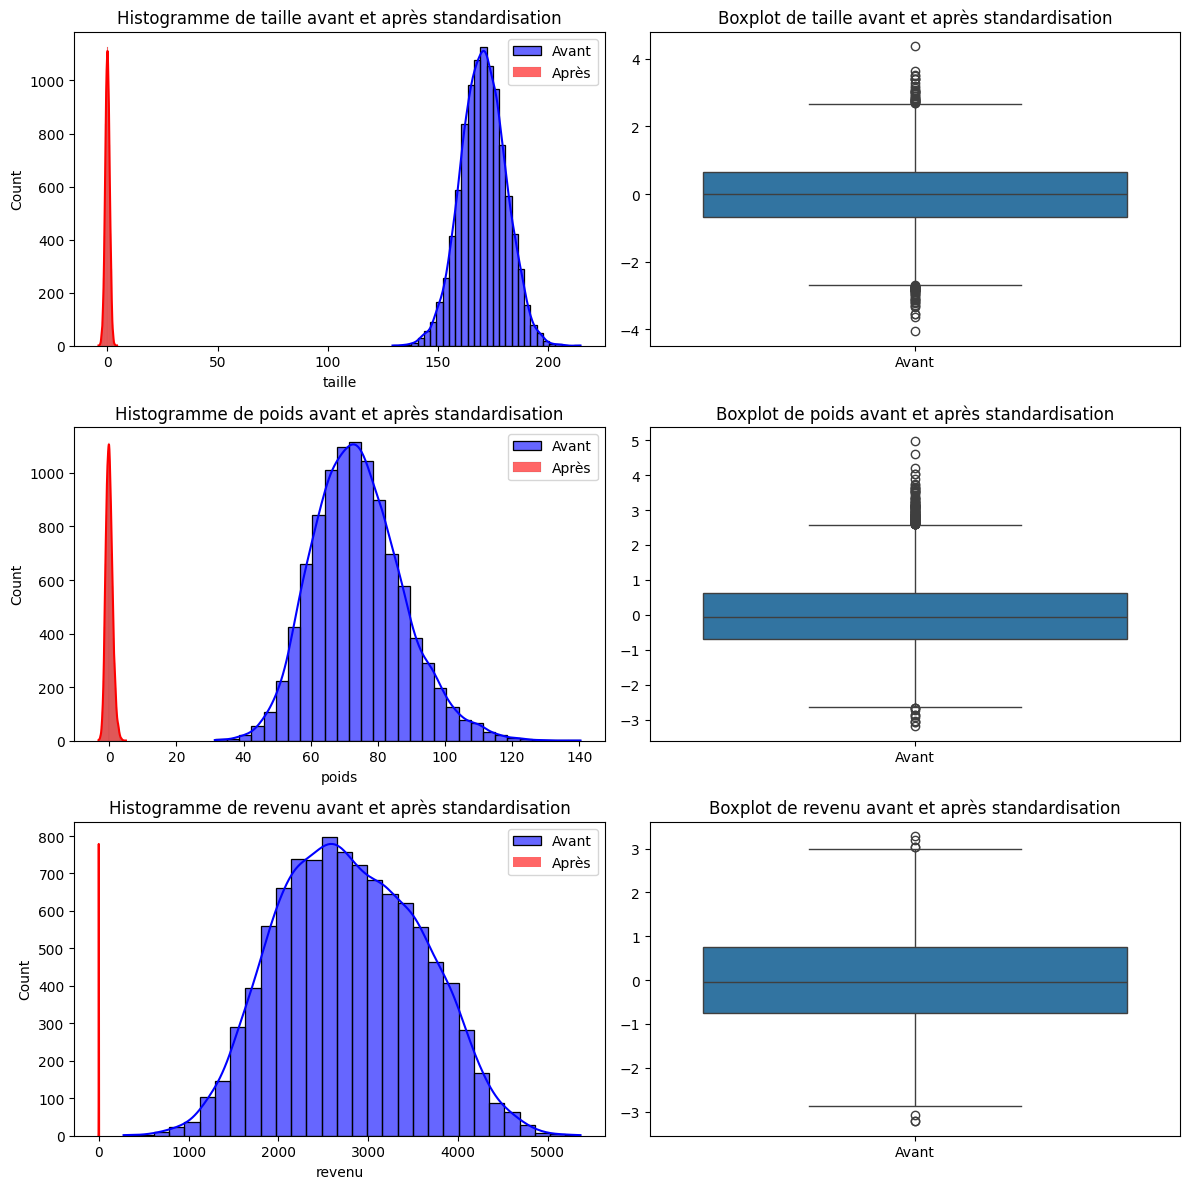

In [37]:
variables_a_comparer = ['taille', 'poids', 'revenu']  # Remplace par les colonnes pertinentes

# Création des sous-graphiques
fig, axes = plt.subplots(len(variables_a_comparer), 2, figsize=(12, len(variables_a_comparer) * 4))

for i, col in enumerate(variables_a_comparer):
    # Histogrammes avant et après standardisation
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0], color='blue', alpha=0.6, label="Avant")
    sns.histplot(df_standardized[col], bins=30, kde=True, ax=axes[i, 0], color='red', alpha=0.6, label="Après")
    axes[i, 0].set_title(f"Histogramme de {col} avant et après standardisation")
    axes[i, 0].legend()

    # Boxplots avant et après standardisation
    sns.boxplot(data=[df[col], df_standardized[col]], ax=axes[i, 1])
    axes[i, 1].set_xticklabels(['Avant', 'Après'])
    axes[i, 1].set_title(f"Boxplot de {col} avant et après standardisation")

plt.tight_layout()
plt.show()

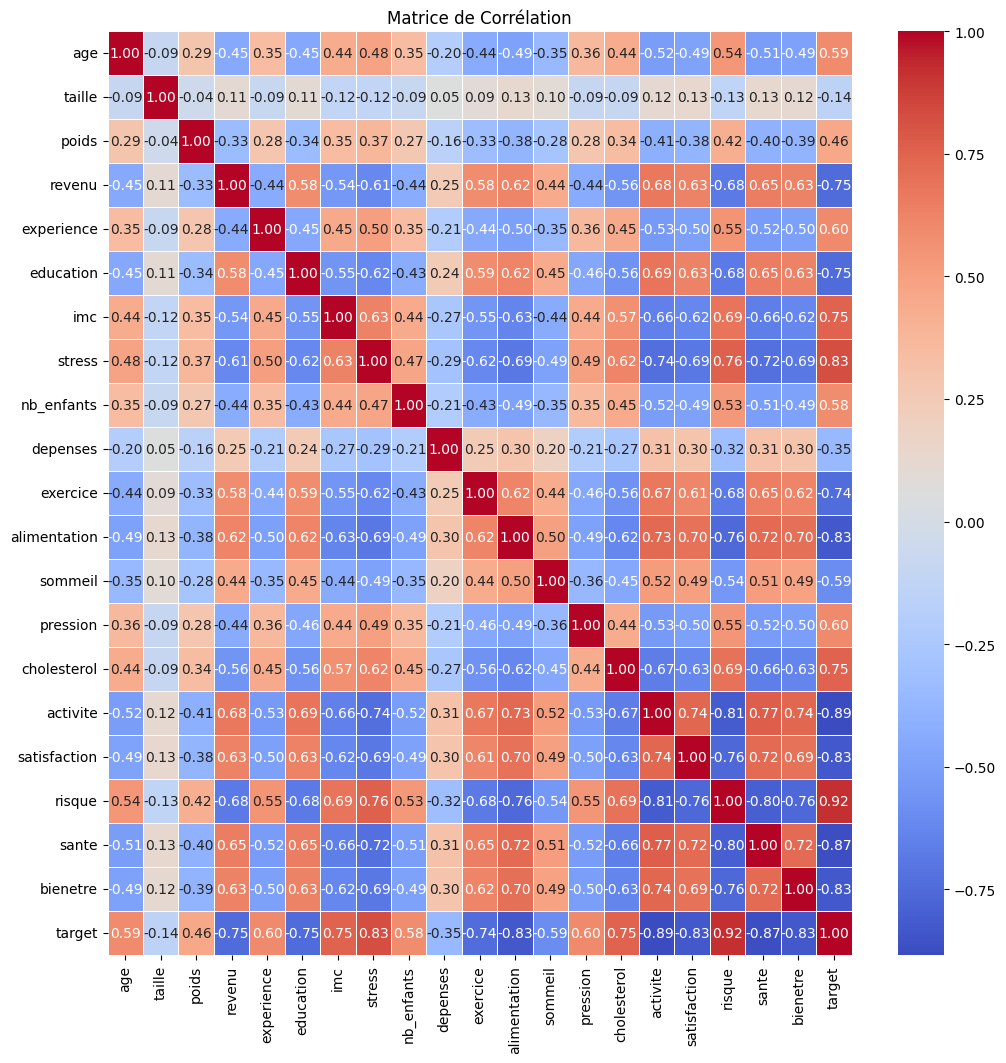

In [33]:
# Calcul de la matrice de corrélation après standardisation
matrice_correlation = df_standardized.corr()
# Calcul de la matrice de corrélation après standardisation
plt.figure(figsize=(12, 12))
sns.heatmap(matrice_correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()


## Réduction de dimension avec PCA

In [7]:
# PCA pour réduction de dimension
pca = PCA(n_components=0.95)  # Conserver 95% de variance
X_pca = pca.fit_transform(df_standardized.drop(columns=['target']))

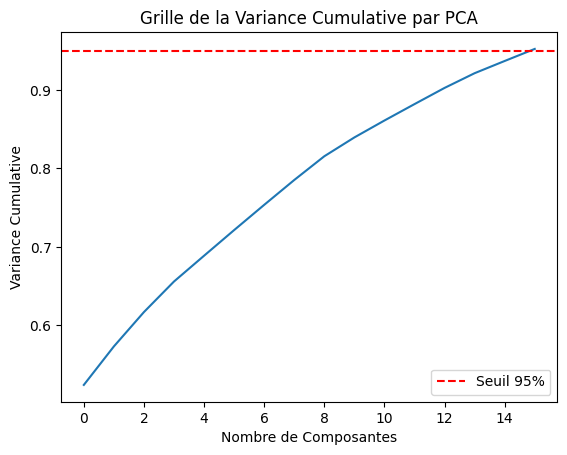

In [8]:
# Visualisation de la variance expliquée par chaque composante
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # La variance cumulative indiquant la somme des variances expliquées par les premières composantes.
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Cumulative')
plt.title('Grille de la Variance Cumulative par PCA')
plt.axhline(y=0.95, color='r', linestyle='--', label='Seuil 95%')
plt.legend()
plt.show()



> * Chaque composante principale capte une partie de la variance totale des données.
* La première composante capte plus de variance, la deuxième un peu moins et ainsi de suite.
* La ligne rouge en pointillé à 0.95 marque le seuil de 95% de variance expliquée.
* On voit à quel nombre de composantes on atteint ce seuil.



## Visualisation de la variance pour chaque composante

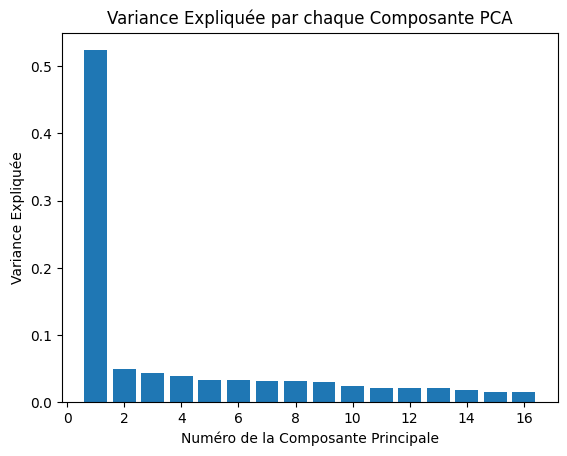

In [38]:
# Afficher un graphique représentant la part de variance expliquée par chaque composante principale après une analyse PCA
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Numéro de la Composante Principale")
plt.ylabel("Variance Expliquée")
plt.title("Variance Expliquée par chaque Composante PCA")
plt.show()


## Séparation du dataset

In [9]:
# Séparation en jeu d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X_pca, df_standardized['target'], test_size=0.2, random_state=42, stratify=df_standardized['target'])


## Régression logistique

In [10]:
# Régression Logistique avec validation croisée
log_reg = LogisticRegression()
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Régression Logistique - Score moyen CV:", np.mean(cv_scores))

Régression Logistique - Score moyen CV: 0.999625


## Matrice de confusion

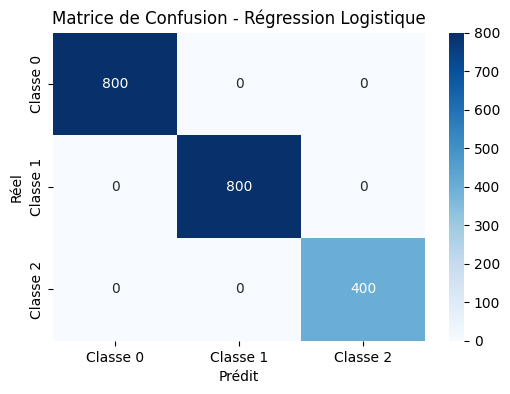

In [11]:
# Prédiction et matrice de confusion
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Classe 0', 'Classe 1', 'Classe 2'], yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - Régression Logistique')
plt.show()

In [12]:
# Précision du modèle et rapport de classification
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Précision du modèle : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       800
           1       1.00      1.00      1.00       800
           2       1.00      1.00      1.00       400

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000





> * Le modèle à classé correctement toutes les données du test, chaque métrique est à 1.00 ce qui confirme la performance du modèle.



## Courbe ROC

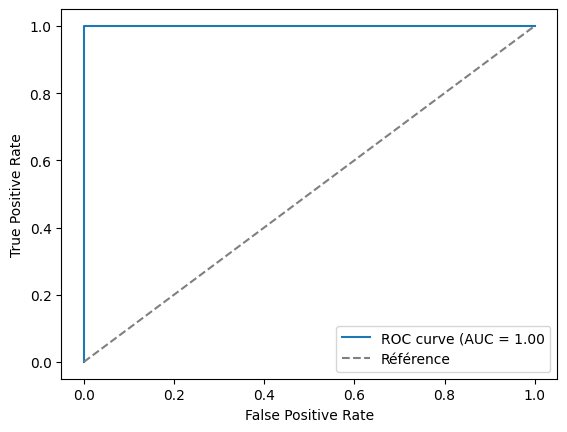

In [13]:
# Courbe ROC
y_probs = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Référence')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



> * L'axe x représente le taux de faux positifs et l'axe y représente le taux de vrais positifs.
L'AUC est à 1 ce qui siginifie que notre modèle classe parfaitement les données.



## Visualisation du PCA

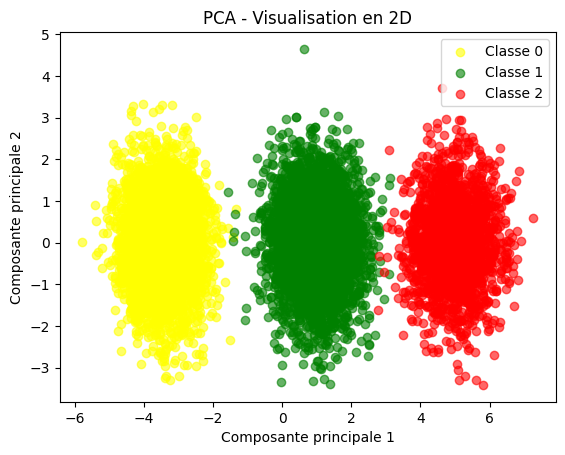

In [14]:
# Affichage du PCA en 2D
plt.figure()
colors = {1: 'green', 0: 'yellow', 2: 'red'}
for target_class in [0, 1, 2]:
    mask = df_standardized['target'] == target_class
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[target_class], label=f'Classe {target_class}', alpha=0.6)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
plt.title('PCA - Visualisation en 2D')
plt.show()



> * Le graphique représente les données après la réduciton de dimension avec la PCA, avec les 2 premières composantes principales.
* Les points sont colorés selon la classe cible : Jaune(classe 0), Vert(classe 1), Rouge(classe 2).



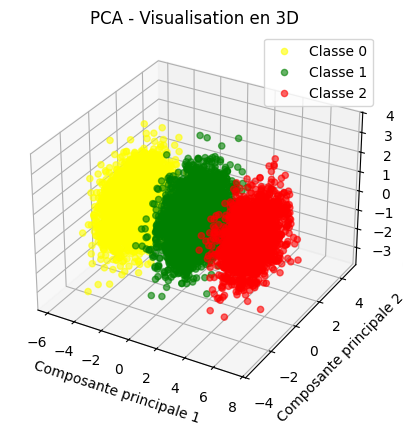

In [15]:
# Affichage du PCA en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for target_class in [0, 1, 2]:
    mask = df_standardized['target'] == target_class
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2], c=colors[target_class], label=f'Classe {target_class}', alpha=0.6)
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')
ax.set_zlabel('Composante principale 3')
ax.legend()
ax.set_title('PCA - Visualisation en 3D')
plt.show()

## Optimisation des modèles avec Grid Search

In [32]:
# Définition des hyperparamètres à tester
param_grid = {'n_neighbors': list(range(1, 20, 2))}  # Seulement des valeurs impaires

# Initialisation du modèle KNN
knn = KNeighborsClassifier()

# Grid Search avec Validation Croisée (cv=5)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraînement du GridSearch
grid_search.fit(X_train, y_train)

# Résultats
print("Meilleur K pour KNN:", grid_search.best_params_)
print("Score moyen en validation croisée:", grid_search.best_score_)

# Évaluer la performance du modèle optimal sur le jeu de test
best_knn = grid_search.best_estimator_
test_score = best_knn.score(X_test, y_test)

print("Score sur le jeu de test avec le meilleur K:", test_score)


Meilleur K pour KNN: {'n_neighbors': 5}
Score moyen en validation croisée: 0.9995
Score sur le jeu de test avec le meilleur K: 0.999




> * La recherche du meilleur K pour Knn après avoir testé des valeurs impaires est de 5. Signifiant que le modèle donne la meilleure performance en utilisant 5 voisins pour la classification. Le score moyen en validation croisée est de 0.99 et le score sur le jeu de test avec le meilleur K est de 0.999.



## Arbre de décision

In [17]:
# Arbre de décision avec Grid Search
param_grid = {'max_depth': range(1, 21), 'min_samples_leaf': range(1, 11)}
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleures hyperparamètres pour l'arbre de décision:", grid_search.best_params_)

Meilleures hyperparamètres pour l'arbre de décision: {'max_depth': 13, 'min_samples_leaf': 1}


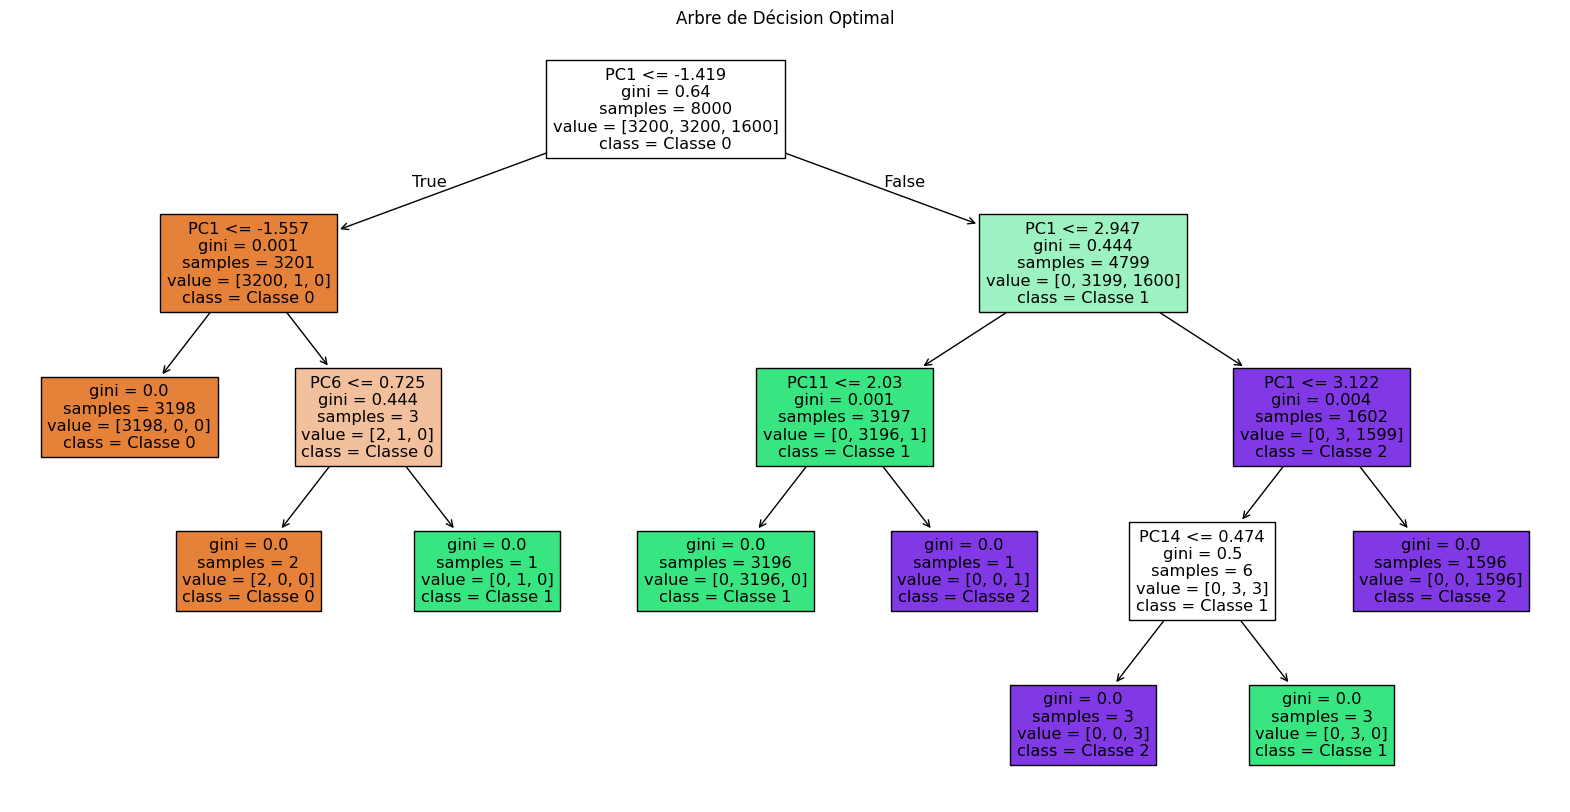

In [18]:
# Affichage de l'arbre de décision
dt_best = grid_search.best_estimator_
plt.figure(figsize=(20, 10))
plot_tree(dt_best, filled=True, feature_names=[f'PC{i+1}' for i in range(X_pca.shape[1])], class_names=['Classe 0', 'Classe 1', 'Classe 2'])
plt.title("Arbre de Décision Optimal")
plt.show()



> *  L’arbre semble bien structuré avec une séparation claire des classes.
* L’indice de Gini est faible ce qui signifie que chaque feuille contient presque uniquement une seule classe.
* L'arbre à une profondeur maximale de 4 niveaux.



## Clustering non supervisé avec K-means

Trouver la méthode du coude automatiquement



In [30]:
!pip install kneed

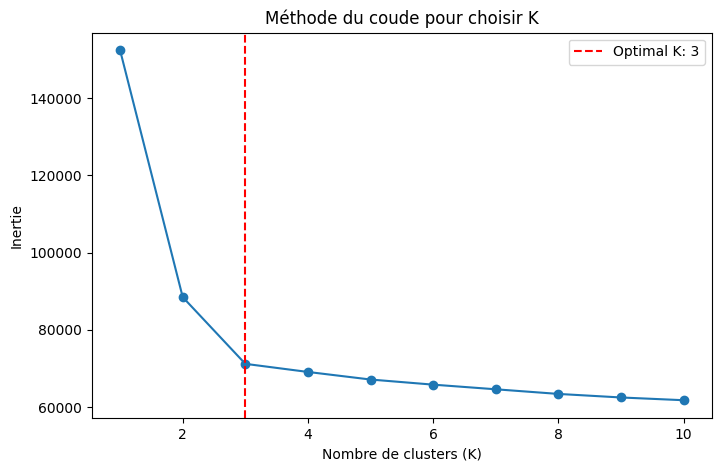

Le nombre optimal de clusters selon la méthode du coude est : 3


In [31]:
# Définition de la plage de K
k_range = range(1, 11)
inertias = []

# Calcul des inerties pour chaque K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

# Trouver le coude automatiquement
knee_locator = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
optimal_k = knee_locator.knee

# Affichage du résultat
plt.figure(figsize=(8,5))
plt.plot(k_range, inertias, marker='o', linestyle='-')
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie")
plt.title("Méthode du coude pour choisir K")
plt.axvline(optimal_k, color='r', linestyle='--', label=f"Optimal K: {optimal_k}")
plt.legend()
plt.show()

print(f"Le nombre optimal de clusters selon la méthode du coude est : {optimal_k}")

> * On peut observer que l'inertie diminue fortement, ce qui siginifie que les clusters deviennent compact et bien séparés.
* Entre K3 et K4 la diminution devient lente et forme un coude dans la courbe.
* La méthode du coude suggère que 3 clusters seraient une bonne option.



## Vérification de la séparation des clusters avec silhouette_score

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_train)
score = silhouette_score(X_train, kmeans.labels_)
print(f'Silhouette Score pour K=3 : {score:.2f}')


Silhouette Score pour K=3 : 0.29




>* Silhouette Score = 0.29. Ce score est faible, ce qui signifie que les clusters ne sont pas bien séparés.



In [ ]:
for k in range(2, 6):  # Tester plusieurs valeurs de K
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    print(f'Silhouette Score pour K={k} : {score:.2f}')


Silhouette Score pour K=2 : 0.35
Silhouette Score pour K=3 : 0.29
Silhouette Score pour K=4 : 0.20
Silhouette Score pour K=5 : 0.10




> * K=2 - Score = 0.35 (Meilleur score)
* K=3 - Score = 0.29
* K=4 - Score = 0.20
* K=5 - Score = 0.10 (Très faible, clusters mal séparés)



## Visualisation des clusters

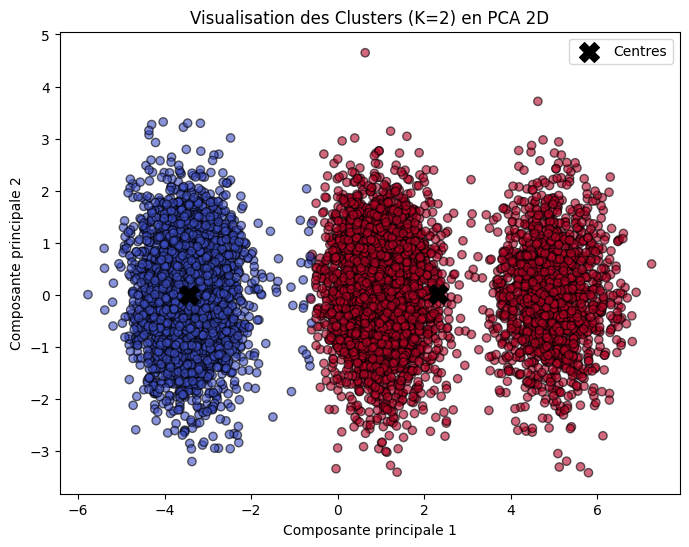

In [ ]:
# Appliquer K-Means avec K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train)

# Affichage en 2D (Premières composantes principales de PCA)
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap='coolwarm', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=200, label='Centres')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Visualisation des Clusters (K=2) en PCA 2D')
plt.legend()
plt.show()




> * Les deux groupes (bleu et rouge) sont bien séparés, ce qui confirme que K2 capture une différence significative dans les données.
* Les centres des clusters (étoiles noires) sont clairement positionnés, ce qui indique une séparation mais le groupe rouge semble avoir une structure plus complexe.


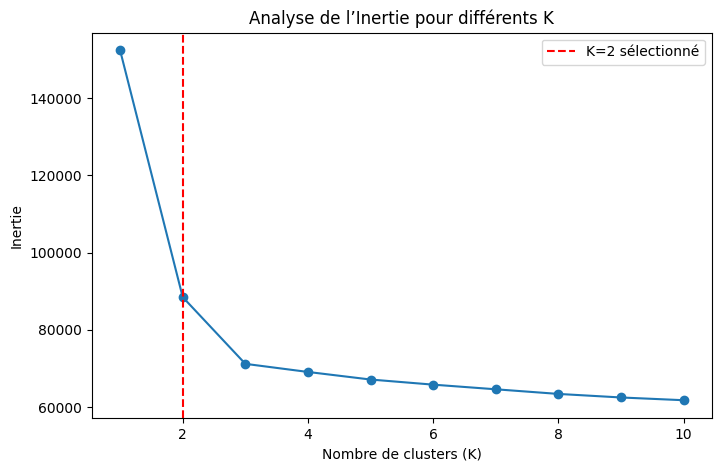

In [ ]:
inertias = []
k_range = range(1, 11)  # Tester K de 1 à 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

# Affichage de la courbe d'inertie
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='-')
plt.axvline(x=2, color='r', linestyle='--', label='K=2 sélectionné')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.title('Analyse de l’Inertie pour différents K')
plt.legend()
plt.show()




> * L’inertie diminue fortement entre K=1 et K=2, ce qui confirme que K=2 est un bon choix en termes de compacité des clusters.
* La méthode du coude indique que K=2 semble être optimal.


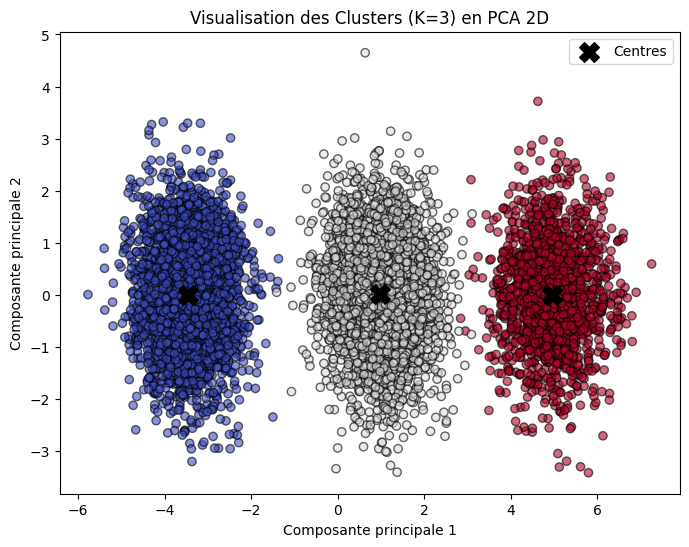

In [ ]:

# Appliquer K-Means avec K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_train)

# Affichage en 2D (Premières composantes principales de PCA)
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=clusters, cmap='coolwarm', alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=200, label='Centres')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Visualisation des Clusters (K=3) en PCA 2D')
plt.legend()
plt.show()




> * Avec K3, on voit que le cluster central (gris) est bien distinct, ce qui montre une séparation plus fine qu’avec K2.
* Les centres des clusters sont bien positionnés et éloignés les uns des autres.



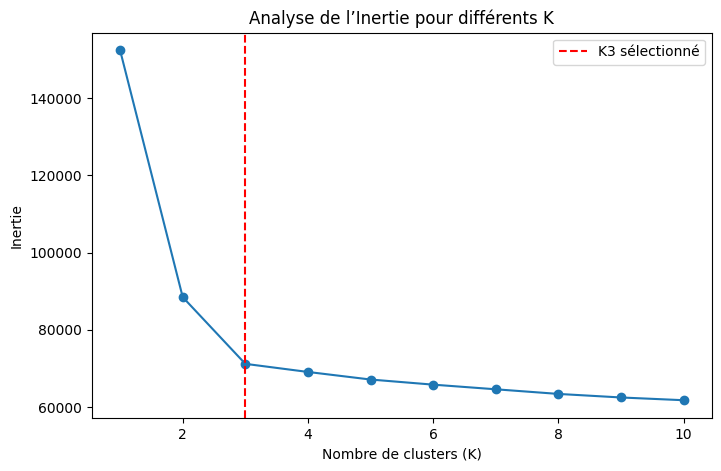

In [ ]:
inertias = []
k_range = range(1, 11)  # Tester K de 1 à 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

# Affichage de la courbe d'inertie
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='-')
plt.axvline(x=3, color='r', linestyle='--', label='K3 sélectionné')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.title('Analyse de l’Inertie pour différents K')
plt.legend()
plt.show()




> * Après K3, la diminution est plus lente, ce qui confirme que K3 est un choix raisonnable



In [ ]:
score = silhouette_score(X_train, clusters)
print(f'Silhouette Score pour K3 : {score:.2f}')


Silhouette Score pour K3 : 0.29




> * Silhouette Score = 0.29

Ce score reste faible, ce qui signifie que les clusters sont mal séparés ou que certains points sont assignés au mauvais cluster.
Comparé à K2 (0.35), K3 ne semble pas améliorer la séparation.



# Conclusion



>
* K3 améliore légèrement la structure des clusters visuellement, mais ne donne pas un meilleur score que K2.

* L’inertie montre que K3 est une bonne option, mais le Silhouette Score est faible, indiquant que les clusters ne sont pas bien définis.

* K3 apporte une meilleure séparation visuelle, mais les clusters restent mal définis.
